Image PreProcessing

In [1]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# define the path to the uploaded zip file
zip_file_path = 'women-fashion.zip'
extract_folder_path = 'women_fashion'

In [6]:
# extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [7]:
# define function to load images
def load_images(image_folder_path, image_files):
    images = []
    for file_name in image_files:
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.webp')):
            img_path = os.path.join(image_folder_path, file_name)
            img = Image.open(img_path).convert('RGB')
            images.append(img)
    return images

In [8]:
# load images
image_folder_path = os.path.join(extract_folder_path, 'women fashion')
image_files = [file for file in os.listdir(image_folder_path) if file.lower().endswith(('jpg', 'jpeg', 'png', 'webp'))]
images = load_images(image_folder_path, image_files)

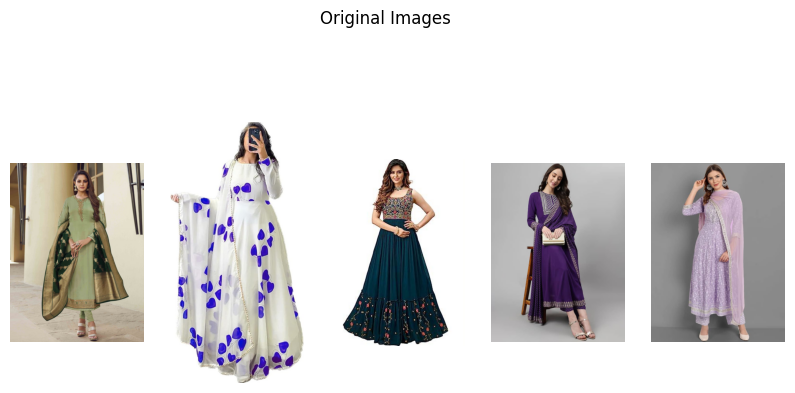

In [9]:
# display original images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

In [10]:
# function to resize images
def resize_images(images, size=(128, 128)):
    resized_images = [img.resize(size) for img in images]
    return resized_images

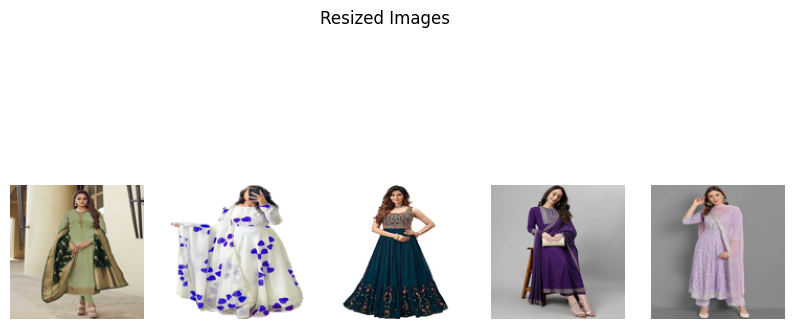

In [11]:
# resize images
resized_images = resize_images(images)

# display resized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.axis('off')
plt.suptitle('Resized Images')
plt.show()

In [12]:
import numpy as np

# function to normalize images
def normalize_images(images):
    normalized_images = [np.array(img) / 255.0 for img in images]
    return np.array(normalized_images)

# normalize images
normalized_images = normalize_images(resized_images)

# print the array of original vs normalized images for the first image
print("Original Image Array:")
print(np.array(resized_images[0]))

print("\nNormalized Image Array:")
print(normalized_images[0])

Original Image Array:
[[[143 114  74]
  [143 114  74]
  [144 115  75]
  ...
  [222 217 197]
  [221 216 196]
  [222 217 197]]

 [[143 114  74]
  [143 114  74]
  [143 114  74]
  ...
  [221 216 196]
  [220 215 195]
  [221 216 196]]

 [[143 114  73]
  [143 114  74]
  [143 114  74]
  ...
  [222 217 197]
  [219 214 194]
  [221 216 196]]

 ...

 [[205 193 177]
  [206 194 178]
  [205 194 176]
  ...
  [176 158 135]
  [174 156 134]
  [172 154 132]]

 [[202 191 173]
  [203 191 173]
  [202 191 173]
  ...
  [180 162 140]
  [177 159 138]
  [173 155 134]]

 [[202 191 173]
  [202 191 173]
  [202 191 173]
  ...
  [179 160 141]
  [177 159 139]
  [180 161 145]]]

Normalized Image Array:
[[[0.56078431 0.44705882 0.29019608]
  [0.56078431 0.44705882 0.29019608]
  [0.56470588 0.45098039 0.29411765]
  ...
  [0.87058824 0.85098039 0.77254902]
  [0.86666667 0.84705882 0.76862745]
  [0.87058824 0.85098039 0.77254902]]

 [[0.56078431 0.44705882 0.29019608]
  [0.56078431 0.44705882 0.29019608]
  [0.56078431 0.447

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [15]:
# example: augment a single image
sample_image = normalized_images[0]
sample_image = np.expand_dims(sample_image, axis=0)
aug_iter = datagen.flow(sample_image)

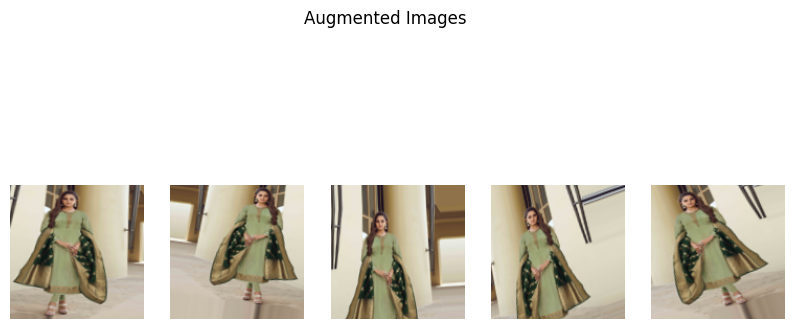

In [16]:
# display augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    batch = next(aug_iter)
    image_aug = batch[0]
    plt.imshow(image_aug)
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

In [18]:
import cv2

# function to apply histogram equalization
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return Image.fromarray(img_equalized)


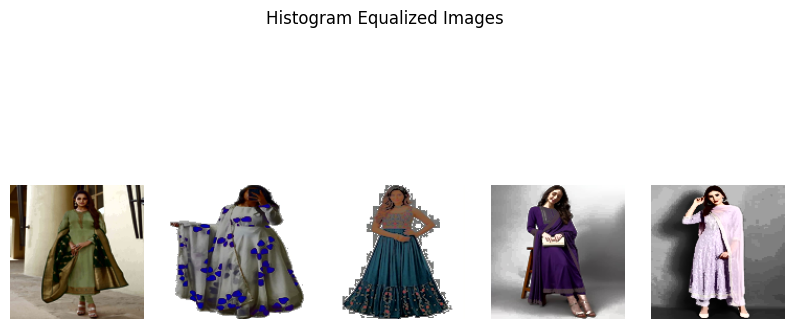

In [19]:

# apply histogram equalization to all images
equalized_images = [histogram_equalization(img) for img in resized_images]

# display histogram equalized images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(equalized_images[i])
    plt.axis('off')
plt.suptitle('Histogram Equalized Images')
plt.show()